<div style="display: flex; text-align:center; background-color: rgb(153,102,153);" >
<h1 style="margin: auto; padding: 30px; ">Réaliser une étude de santé avec Python <br>
</h1>
</div>

# Scénario

Je viens de rejoindre une équipe de chercheurs de la FAO en tant que data analyst. Notre mission est de réaliser une étude de grande ampleur sur le thème de la sous-nutrition dans le monde :

- Avoir un panorama de l’état de la malnutrition dans le monde en 2017 (Questions de Marc + 2 de Julien)
- Avoir une étude un peu plus fine pour chacun des pays (Question de Mélanie)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 1 - Importation des librairies et fichiers</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_pop = pd.read_csv("population.csv")
df_sous_nutri = pd.read_csv("sous_nutrition.csv")
df_aide_ali =pd.read_csv("aide_alimentaire.csv")
df_dispo_ali = pd.read_csv("dispo_alimentaire.csv")
liste_cereales = pd.read_csv("liste_cereales2.csv")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 2 - Nettoyage et normalisation</h2>
</div>

Méthodologie : 
- Premier visuel : head(), shape, dtypes, unique(), describe()...
- Modification du nom des colonnes : rename(), .columns=
- Modification des types de D si besoin : astype(), to_numeric()
- Recherche doublon : duplicated()
- Recherche et modifications valeur manquante : isna(), fillna()...
- Conversion des unités au besoin : column*10^x

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">1.1- Fichier population </h3>
</div>


In [3]:
df_pop.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [4]:
df_pop.shape

(1416, 3)

In [5]:
df_pop.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [6]:
df_pop["Année"].unique()

array([2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [7]:
df_pop["Valeur"].unique().tolist()

[32269.589,
 33370.794,
 34413.603,
 35383.032,
 36296.113,
 37171.921,
 53687.121,
 54544.186,
 55386.367,
 56207.64599999999,
 57009.756,
 57792.518,
 2903.79,
 2896.305,
 2890.513,
 2886.438,
 2884.169000000001,
 2882.74,
 38140.133,
 38923.692,
 39728.025,
 40551.392,
 41389.189,
 42228.408,
 81174.367,
 81450.378,
 81787.411,
 82193.768,
 82658.409,
 83124.418,
 80.774,
 79.21300000000002,
 78.01100000000002,
 77.297,
 77.001,
 77.006,
 26015.781000000006,
 26941.779,
 27884.381,
 28842.489,
 29816.766,
 30809.787,
 13.954,
 14.112,
 14.279000000000002,
 14.429,
 14.584,
 14.731,
 91.516,
 92.562,
 93.566,
 94.527,
 95.426,
 96.286,
 263.872,
 267.006,
 269.936,
 272.693,
 275.186,
 277.483,
 30052.059,
 30916.597,
 31717.667,
 32443.447,
 33101.179,
 33702.756,
 42196.03,
 42637.511,
 43075.416,
 43508.46,
 43937.14,
 44361.15,
 2897.588,
 2912.409,
 2925.553,
 2936.143,
 2944.791,
 2951.745,
 103.159,
 103.774,
 104.341,
 104.872,
 105.366,
 105.845,
 23254.913,
 23596.424,
 239

In [8]:
df_pop.columns= ["Pays", "Annee", "Nb_habitants"]

In [9]:
df_pop.Nb_habitants=df_pop.Nb_habitants*10**3
df_pop.head()

,Pays,Annee,Nb_habitants
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


In [10]:
df_pop.duplicated().sum()

0

In [11]:
df_pop.isna().sum()

Pays            0
Annee           0
Nb_habitants    0
dtype: int64

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">1.2- Fichier sous_nutrition </h3>
</div>

In [12]:
df_sous_nutri.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [13]:
df_sous_nutri.shape

(1218, 3)

In [14]:
df_sous_nutri.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

In [15]:
df_sous_nutri["Valeur"].unique()

array(['8.6', '8.8', '8.9', '9.7', '10.5', '11.1', '2.2', '2.5', '2.8',
       '3', '3.1', '3.3', '0.1', '1.3', '1.2', nan, '7.6', '6.2', '5.3',
       '5.6', '5.8', '5.7', '1.5', '1.6', '1.1', '1.7', '<0.1', '21.7',
       '22.4', '23.3', '22.3', '21.5', '20.9', '0.8', '2', '1.9', '1.8',
       '0.4', '0.5', '0.3', '0.2', '3.2', '3.4', '3.6', '3.8', '2.1',
       '2.3', '2.4', '0.6', '0.7', '0.9', '3.9', '2.7', '1.4', '4.8',
       '4.6', '4.9', '5', '4.4', '4.3', '4.2', '4.5', '26.2', '24.3',
       '21.3', '21.1', '2.9', '5.1', '5.2', '5.4', '203.8', '198.3',
       '193.1', '190.9', '190.1', '189.2', '23.6', '24', '24.1', '3.7',
       '7.3', '7.8', '8.4', '9', '9.1', '10.1', '10', '10.7', '11.5',
       '11.9', '11.8', '8.7', '10.3', '11', '1', '5.5', '6.8', '7.9',
       '5.9', '7', '9.2', '9.4', '9.6', '6.7', '7.1', '7.2', '14.7',
       '17.4', '20.2', '22.2', '22.8', '24.6', '31.1', '28.5', '25.4',
       '24.8', '26.1', '14.5', '15.4', '16.5', '15.8', '15.7', '10.8',
       '

In [16]:
## On voit qu'il y a des nan et des "<0.1", on va d'abord remplacer par 0 le <0.1
df_sous_nutri=df_sous_nutri.replace("<0.1", "0")
df_sous_nutri["Valeur"].unique()

array(['8.6', '8.8', '8.9', '9.7', '10.5', '11.1', '2.2', '2.5', '2.8',
       '3', '3.1', '3.3', '0.1', '1.3', '1.2', nan, '7.6', '6.2', '5.3',
       '5.6', '5.8', '5.7', '1.5', '1.6', '1.1', '1.7', '0', '21.7',
       '22.4', '23.3', '22.3', '21.5', '20.9', '0.8', '2', '1.9', '1.8',
       '0.4', '0.5', '0.3', '0.2', '3.2', '3.4', '3.6', '3.8', '2.1',
       '2.3', '2.4', '0.6', '0.7', '0.9', '3.9', '2.7', '1.4', '4.8',
       '4.6', '4.9', '5', '4.4', '4.3', '4.2', '4.5', '26.2', '24.3',
       '21.3', '21.1', '2.9', '5.1', '5.2', '5.4', '203.8', '198.3',
       '193.1', '190.9', '190.1', '189.2', '23.6', '24', '24.1', '3.7',
       '7.3', '7.8', '8.4', '9', '9.1', '10.1', '10', '10.7', '11.5',
       '11.9', '11.8', '8.7', '10.3', '11', '1', '5.5', '6.8', '7.9',
       '5.9', '7', '9.2', '9.4', '9.6', '6.7', '7.1', '7.2', '14.7',
       '17.4', '20.2', '22.2', '22.8', '24.6', '31.1', '28.5', '25.4',
       '24.8', '26.1', '14.5', '15.4', '16.5', '15.8', '15.7', '10.8',
       '11.

In [17]:
df_sous_nutri["Valeur"]=pd.to_numeric(df_sous_nutri["Valeur"])*10**6
df_sous_nutri["Valeur"].head()

0     8600000.0
1     8800000.0
2     8900000.0
3     9700000.0
4    10500000.0
Name: Valeur, dtype: float64

In [18]:
df_sous_nutri.columns= ["Pays", "Annee", "Valeur_sous_nutri"]

In [19]:
df_sous_nutri["Annee"].replace("2012-2014","2013", inplace=True)
df_sous_nutri["Annee"].replace("2013-2015","2014", inplace=True)
df_sous_nutri["Annee"].replace("2014-2016","2015", inplace=True)
df_sous_nutri["Annee"].replace("2015-2017","2016", inplace=True)
df_sous_nutri["Annee"].replace("2016-2018","2017", inplace=True)
df_sous_nutri["Annee"].replace("2017-2019","2018", inplace=True)

In [20]:
df_sous_nutri.duplicated().sum()

0

In [21]:
#On a vu tout à l'heure qu'il y avait des nan, effectivement il y en a 594
df_sous_nutri.isna().sum()

Pays                   0
Annee                  0
Valeur_sous_nutri    594
dtype: int64

In [22]:
df_sous_nutri["Valeur_sous_nutri"].fillna(0, inplace=True)
df_sous_nutri.isna().sum()

Pays                 0
Annee                0
Valeur_sous_nutri    0
dtype: int64

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">1.3- Fichier aide_alimentaire </h3>
</div>

In [23]:
df_aide_ali.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [24]:
df_aide_ali.shape

(1475, 4)

In [25]:
df_aide_ali.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

In [26]:
df_aide_ali.columns=["Pays", "Annee", "Produit_aide", "Qte_produit_aide(tonne)" ]
df_aide_ali.head()

,Pays,Annee,Produit_aide,Qte_produit_aide(tonne)
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [27]:
df_aide_ali.duplicated().sum()

0

In [28]:
df_aide_ali.isna().sum()

Pays                       0
Annee                      0
Produit_aide               0
Qte_produit_aide(tonne)    0
dtype: int64

In [29]:
df_aide_ali.describe(include="all")

,Pays,Annee,Produit_aide,Qte_produit_aide(tonne)
count,1475,1475.000000,1475,1475.000000
unique,76,NaN,16,NaN
top,Algérie,NaN,Non-céréales,NaN
freq,39,NaN,220,NaN
mean,NaN,2014.054237,NaN,7481.966780
std,NaN,0.946916,NaN,23339.531424
min,NaN,2013.000000,NaN,0.000000
25%,NaN,2013.000000,NaN,287.500000
50%,NaN,2014.000000,NaN,1178.000000
75%,NaN,2015.000000,NaN,4334.500000


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">1.4- Fichier Dispo_alimentaire </h3>
</div>

In [30]:
df_dispo_ali.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [31]:
df_dispo_ali.shape

(15605, 18)

In [32]:
df_dispo_ali.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [33]:
df_dispo_ali.columns = ["Pays", "Produit", "Origine", "Aliment_animaux", "Autre_utilisation", "Dispo_alim(cal/personne/jour)", "Dispo_ali_qte(kg/personne/an)", "Dispo_matiere_grasse(g/personne/jour)", "Dispo_proteine(g/personne/jour)", "Dispo_interieure", "Exportations", "Importations",  "Nourriture", "Pertes", "Production", "Semences", "Traitement", "Variation_stock"]

In [34]:
df_dispo_ali.Aliment_animaux=df_dispo_ali.Aliment_animaux*10**3
df_dispo_ali.Autre_utilisation=df_dispo_ali.Autre_utilisation*10**3
df_dispo_ali.Dispo_interieure=df_dispo_ali.Dispo_interieure*10**3
df_dispo_ali.Exportations=df_dispo_ali.Exportations*10**3
df_dispo_ali.Importations=df_dispo_ali.Importations*10**3
df_dispo_ali.Nourriture=df_dispo_ali.Nourriture*10**3
df_dispo_ali.Pertes=df_dispo_ali.Pertes*10**3
df_dispo_ali.Production=df_dispo_ali.Production*10**3
df_dispo_ali.Semences=df_dispo_ali.Semences*10**3
df_dispo_ali.Traitement=df_dispo_ali.Traitement*10**3
df_dispo_ali.Variation_stock=df_dispo_ali.Variation_stock*10**3

In [35]:
df_dispo_ali.duplicated().sum()

0

In [36]:
#mean pour changer un peu de sum(), bcp de données manquantes
df_dispo_ali.isna().mean()

Pays                                     0.000000
Produit                                  0.000000
Origine                                  0.000000
Aliment_animaux                          0.825697
Autre_utilisation                        0.647805
Dispo_alim(cal/personne/jour)            0.087408
Dispo_ali_qte(kg/personne/an)            0.101890
Dispo_matiere_grasse(g/personne/jour)    0.244217
Dispo_proteine(g/personne/jour)          0.259148
Dispo_interieure                         0.014290
Exportations                             0.216533
Importations                             0.048254
Nourriture                               0.101890
Pertes                                   0.725857
Production                               0.411727
Semences                                 0.866004
Traitement                               0.853124
Variation_stock                          0.565780
dtype: float64

In [37]:
df_dispo_ali.fillna(0, inplace=True)
df_dispo_ali.isna().sum()

Pays                                     0
Produit                                  0
Origine                                  0
Aliment_animaux                          0
Autre_utilisation                        0
Dispo_alim(cal/personne/jour)            0
Dispo_ali_qte(kg/personne/an)            0
Dispo_matiere_grasse(g/personne/jour)    0
Dispo_proteine(g/personne/jour)          0
Dispo_interieure                         0
Exportations                             0
Importations                             0
Nourriture                               0
Pertes                                   0
Production                               0
Semences                                 0
Traitement                               0
Variation_stock                          0
dtype: int64

In [38]:
df_dispo_ali.describe(include="all")

,Pays,Produit,Origine,Aliment_animaux,Autre_utilisation,Dispo_alim(cal/personne/jour),Dispo_ali_qte(kg/personne/an),Dispo_matiere_grasse(g/personne/jour),Dispo_proteine(g/personne/jour),Dispo_interieure,Exportations,Importations,Nourriture,Pertes,Production,Semences,Traitement,Variation_stock
count,15605,15605,15605,1.560500e+04,1.560500e+04,15605.000000,15605.000000,15605.000000,15605.000000,1.560500e+04,1.560500e+04,1.560500e+04,1.560500e+04,1.560500e+04,1.560500e+04,1.560500e+04,1.560500e+04,1.560500e+04
unique,174,98,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Inde,Abats Comestible,vegetale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,174,11896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,8.357866e+04,5.543243e+04,31.748927,7.830948,0.969754,0.906513,6.311435e+05,8.664902e+04,8.305370e+04,3.124805e+05,2.907389e+04,6.414406e+05,9.912272e+03,1.412808e+05,-6.690292e+03
std,NaN,NaN,NaN,1.779289e+06,3.013630e+06,102.961194,23.478909,3.246695,3.143516,9.002564e+06,9.334352e+05,7.000995e+05,4.242855e+06,5.846722e+05,9.270864e+06,1.948978e+05,3.992568e+06,3.623808e+05
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,-21.000000,-1.930000,-0.030000,-0.370000,-3.430000e+06,-4.100000e+04,-2.010000e+05,-2.460000e+05,0.000000e+00,0.000000e+00,0.000000e+00,-1.900000e+04,-3.986300e+07
25%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.010000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,3.000000,0.520000,0.020000,0.020000,6.000000e+03,0.000000e+00,1.000000e+03,3.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,18.000000,4.270000,0.310000,0.350000,7.300000e+04,4.000000e+03,1.600000e+04,4.000000e+04,0.000000e+00,4.200000e+04,0.000000e+00,0.000000e+00,0.000000e+00


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 3 - Analyse</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.1- Questions de Marc </h3>
</div>


### Question 1 : proportion de personnes en état de sous-nutrition 

In [39]:
#Merge entre fichier population et sous nutrition de 2017
prop_sous_nutri = pd.merge(df_pop.loc[df_pop["Annee"]== 2017, ["Pays", "Nb_habitants"]],
                           df_sous_nutri.loc[df_sous_nutri["Annee"]== "2017", ["Pays", "Valeur_sous_nutri"]],
                           on="Pays")
prop_sous_nutri

,Pays,Nb_habitants,Valeur_sous_nutri
0,Afghanistan,36296113.0,10500000.0
1,Afrique du Sud,57009756.0,3100000.0
2,Albanie,2884169.0,100000.0
3,Algérie,41389189.0,1300000.0
4,Allemagne,82658409.0,0.0
...,...,...,...
198,Venezuela (République bolivarienne du),29402484.0,8000000.0
199,Viet Nam,94600648.0,6500000.0
200,Yémen,27834819.0,0.0
201,Zambie,16853599.0,0.0


In [40]:
# Pop mondiale de 2017 : 
total_pop2017 = df_pop.loc[df_pop['Annee'] == 2017,"Nb_habitants"].sum()
print("La population mondiale en 2017 est de : ", str(total_pop2017))

La population mondiale en 2017 est de :  7548134111.0


In [41]:
# Nb de personnes sous-nutries :
pop_sous_nutri = prop_sous_nutri.Valeur_sous_nutri.sum() 
print("Il y a au total " , str(pop_sous_nutri), " personnes sous-nutries en 2017")

Il y a au total  535700000.0  personnes sous-nutries en 2017


Text(1, 267850000.0, '535700000')

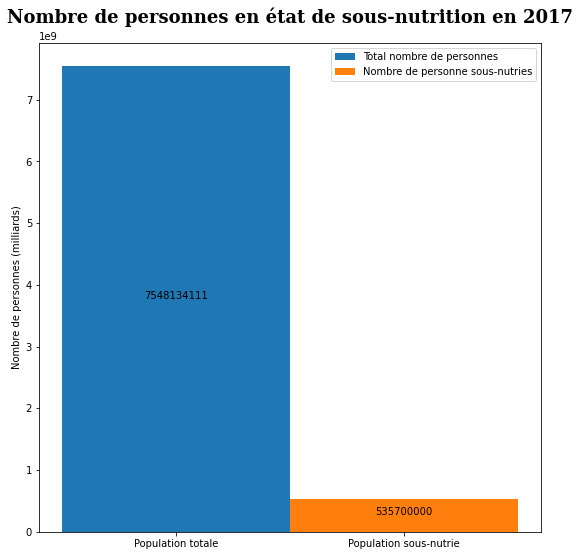

In [42]:
pop = [7548134111]
x2 = ["Population totale"]
x3 = ["Population sous-nutrie"]
sous_nutrie = [535700000]

plt.figure(figsize=(9,9))
plt.bar(x2, pop,  width= 1, label="Total nombre de personnes")
plt.bar(x3, sous_nutrie, width= 1, label="Nombre de personne sous-nutries")
plt.title("Nombre de personnes en état de sous-nutrition en 2017", pad=(20),
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18});
plt.ylabel("Nombre de personnes (milliards)")
plt.legend()

# Annotating the bar plot with the values midle
plt.annotate(pop[0], (0,pop[0]/2), ha="center")
plt.annotate(sous_nutrie[0], ( 1,sous_nutrie[0]/2),ha="center")




# TOUT EN HAUT DES BARS
#plt.annotate(pop[0], (0,pop[0]+1), ha="center")
#plt.annotate(sous_nutrie[0], ( 1, sous_nutrie[0]+1),ha="center")

In [43]:
# On veut connaître la proportion de personnes sous-nutries :
prop_sous_nutri_mondiale = ((prop_sous_nutri.Valeur_sous_nutri.sum() * 100) / prop_sous_nutri.Nb_habitants.sum()) 
print("La proportion mondiale de personnes en sous nutrition est de ", "{:.2f}".format(round(prop_sous_nutri_mondiale,2)) ,"%")

La proportion mondiale de personnes en sous nutrition est de  7.10 %


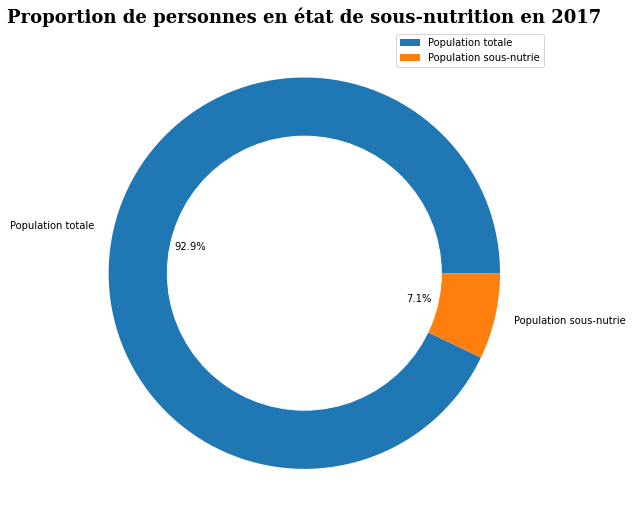

In [44]:
graph_popsousnutrie = [7548134111-535700000, 535700000]

plt.figure(figsize=(9,9))
plt.pie(graph_popsousnutrie, labels=["Population totale","Population sous-nutrie"],
         normalize = True,
       autopct =lambda x: str(round(x, 2)) + '%' )
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Proportion de personnes en état de sous-nutrition en 2017",
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
plt.legend()

### Question 2 : nombre théorique de personnes qui pourraient être nourries 

In [45]:
#Merge entre dispo_alimentaire et population
pop_nourries = pd.merge(left= df_dispo_ali[["Pays", "Produit", "Origine", "Dispo_alim(cal/personne/jour)"]], \
                       right= df_pop.loc[df_pop["Annee"]==2017, ["Pays", "Nb_habitants"]], how="left", on="Pays")
pop_nourries

,Pays,Produit,Origine,Dispo_alim(cal/personne/jour),Nb_habitants
0,Afghanistan,Abats Comestible,animale,5.0,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,1.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,1.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,36296113.0
4,Afghanistan,Bananes,vegetale,4.0,36296113.0
...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,45.0,636039.0
15601,Îles Salomon,Viande de Volailles,animale,11.0,636039.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,636039.0
15603,Îles Salomon,Vin,vegetale,0.0,636039.0


In [46]:
# On crée une nouvelle colonne ds le tableau avec comme résultat le nb de personne nourries par an en fct de la dispo ali de chaque pdt
pop_nourries["dispo_total_annee"]=pop_nourries["Dispo_alim(cal/personne/jour)"] * 365 * pop_nourries["Nb_habitants"]
pop_nourries["dispo_total_annee"]

0        6.624041e+10
1        1.324808e+10
2        1.324808e+10
3        0.000000e+00
4        5.299232e+10
             ...     
15600    1.044694e+10
15601    2.553697e+09
15602    0.000000e+00
15603    0.000000e+00
15604    9.286169e+08
Name: dispo_total_annee, Length: 15605, dtype: float64

In [47]:
# On veut savoir cmb de personnes on pourrait nourrir par an :
dispo_mondiale= pop_nourries["dispo_total_annee"].sum() / (2500*365)
print("On peut nourrir " , (round(dispo_mondiale,0)), "personnes au niveau mondial")

On peut nourrir  8367593851.0 personnes au niveau mondial


Text(1, 4183796925.5, '8367593851')

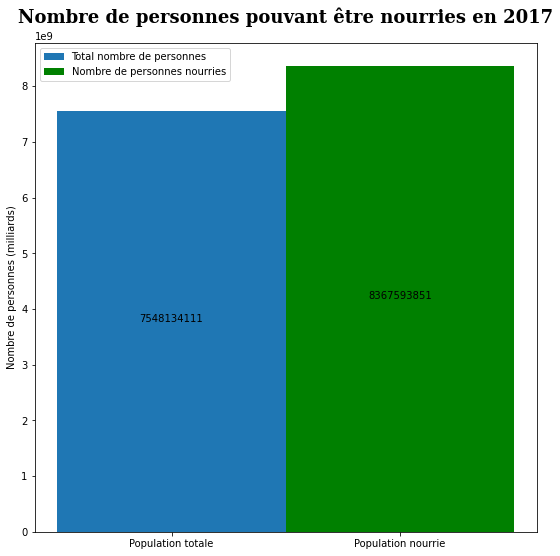

In [48]:
pop = [7548134111]
x2 = ["Population totale"]
x3 = ["Population nourrie"]
pop_nourrie = [8367593851]

plt.figure(figsize=(9,9))
plt.bar(x2, pop,  width= 1, label="Total nombre de personnes")
plt.bar(x3, pop_nourrie, width= 1, label="Nombre de personnes nourries", color="green")
plt.title("Nombre de personnes pouvant être nourries en 2017", pad=(20),
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18});
plt.ylabel("Nombre de personnes (milliards)")
plt.legend()

# Annotating the bar plot with the values midle
plt.annotate(pop[0], (0,pop[0]/2), ha="center")
plt.annotate(pop_nourrie[0], ( 1,pop_nourrie[0]/2),ha="center")


In [49]:
# Proportion:
print("La proportion de personnes qui pourraient être nourries en 2017 est :", round((dispo_mondiale*100)/total_pop2017,2),"% de la population mondiale")

La proportion de personnes qui pourraient être nourries en 2017 est : 110.86 % de la population mondiale


### Question 3 : nb théorique de personnes qui pourraient être nourries avec les pdts végétaux 

In [50]:
# On avait déjà un merge où on avait mis la colonne origine pour anticiper cette question :
dispo_alim_veg = pop_nourries.loc[pop_nourries["Origine"]=="vegetale" ]
dispo_alim_veg

,Pays,Produit,Origine,Dispo_alim(cal/personne/jour),Nb_habitants,dispo_total_annee
1,Afghanistan,"Agrumes, Autres",vegetale,1.0,36296113.0,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,1.0,36296113.0,1.324808e+10
3,Afghanistan,Ananas,vegetale,0.0,36296113.0,0.000000e+00
4,Afghanistan,Bananes,vegetale,4.0,36296113.0,5.299232e+10
6,Afghanistan,Bière,vegetale,0.0,36296113.0,0.000000e+00
...,...,...,...,...,...,...
15595,Îles Salomon,Sésame,vegetale,0.0,636039.0,0.000000e+00
15596,Îles Salomon,Thé,vegetale,0.0,636039.0,0.000000e+00
15597,Îles Salomon,Tomates,vegetale,0.0,636039.0,0.000000e+00
15603,Îles Salomon,Vin,vegetale,0.0,636039.0,0.000000e+00


On note qu'il y a bcp plus de pdts d'origine végétale que animale (76,23%)

In [51]:
# Cmb de personnes on pourrait nourrir avec des pdts végétaux :
dispo_veg_mondiale=dispo_alim_veg["dispo_total_annee"].sum() / (2500*365)
print("On pourrait nourrir", int(dispo_veg_mondiale), "personnes avec des pdts d'origine végétale par an")

On pourrait nourrir 6904305684 personnes avec des pdts d'origine végétale par an


Text(1, 3452152842.0, '6904305684')

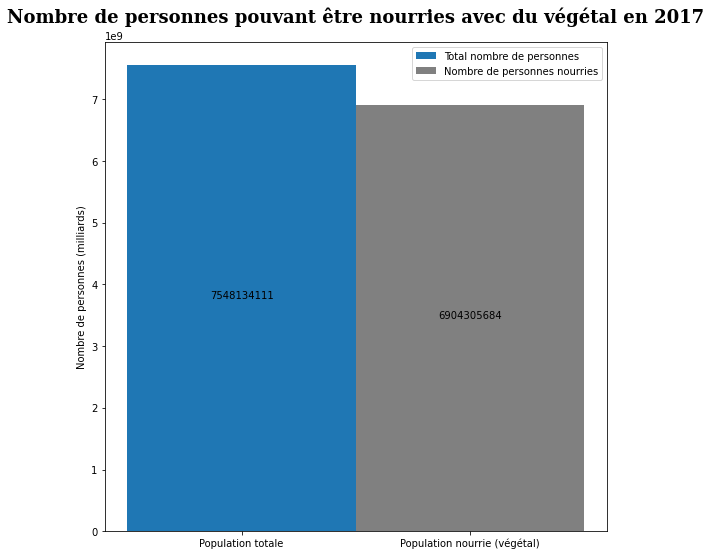

In [52]:
pop = [7548134111]
x2 = ["Population totale"]
x3 = ["Population nourrie (végétal)"]
pop_nourrie = [6904305684]

plt.figure(figsize=(9,9))
plt.bar(x2, pop,  width= 1, label="Total nombre de personnes")
plt.bar(x3, pop_nourrie, width= 1, label="Nombre de personnes nourries", color="grey")
plt.title("Nombre de personnes pouvant être nourries avec du végétal en 2017", pad=(20),
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18});
plt.ylabel("Nombre de personnes (milliards)")
plt.legend()

# Annotating the bar plot with the values midle
plt.annotate(pop[0], (0,pop[0]/2), ha="center")
plt.annotate(pop_nourrie[0], ( 1,pop_nourrie[0]/2),ha="center")

In [53]:
# Sa proportion :
prop_dispo_veg_mondiale = (dispo_veg_mondiale*100)/total_pop2017
print("La proportion de personne qui pourrait être nourrie avec des produits d'origine végétale en 2017 est : ", str(round(prop_dispo_veg_mondiale,2)),"% de la population mondiale")

La proportion de personne qui pourrait être nourrie avec des produits d'origine végétale en 2017 est :  91.47 % de la population mondiale


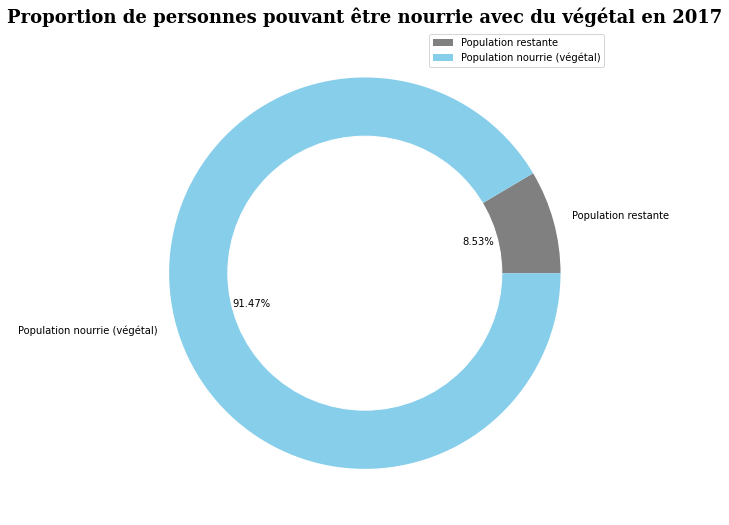

In [54]:
graph_vegetaux = [7548134111-6904305684, 6904305684]


plt.figure(figsize=(9,9))
plt.pie(graph_vegetaux, labels=["Population restante","Population nourrie (végétal)"],colors=["grey", "skyblue"], 
         normalize = True,
       autopct =lambda x: str(round(x, 2)) + '%' )
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Proportion de personnes pouvant être nourrie avec du végétal en 2017",
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
plt.legend()




### Question 4 : l’utilisation de la disponibilité intérieure avec la part de l’alimentation animale, humaine et celle qui est perdue

**Disponibilité intérieure (quantités disponibles d'un aliment pour un pays) =** Production + importations - exportations + variations des stocks (baisse ou augmentation) \
source :http://www.fao.org/3/x9892f/x9892f03.htm

In [55]:
# Qté de disponibilité alimentaire mondiale en 2017 : 
dispo_interieur2017= df_dispo_ali["Dispo_interieure"].sum()
print("Pour l'année 2017, la dispo intérieure mondiale était de " , str(dispo_interieur2017) , " tonnes.")

Pour l'année 2017, la dispo intérieure mondiale était de  9848994000.0  tonnes.


In [56]:
# Création d'une fonction pour calculer les pourcentages :
def afficherPart(df, col, total):
    part = (df[str(col)].sum()*100)/total
    print("La part attribuée à :" , str(col),"est :", round(part, 2) , "%.")

# Puis boucle for pour les différentes variales demandées :
variables = "Aliment_animaux", "Nourriture", "Pertes", "Autre_utilisation", "Semences", "Traitement" 
for i in variables :
    afficherPart(df_dispo_ali,i,dispo_interieur2017)

La part attribuée à : Aliment_animaux est : 13.24 %.
La part attribuée à : Nourriture est : 49.51 %.
La part attribuée à : Pertes est : 4.61 %.
La part attribuée à : Autre_utilisation est : 8.78 %.
La part attribuée à : Semences est : 1.57 %.
La part attribuée à : Traitement est : 22.38 %.


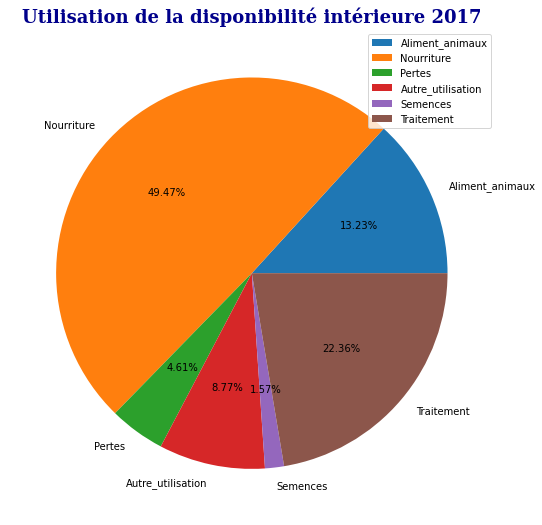

In [87]:
x = [13.24, 49.51, 4.61, 8.78, 1.57, 22.38] 


plt.figure(figsize=(9,9))
plt.pie(x, labels = ['Aliment_animaux', 'Nourriture', 'Pertes', 'Autre_utilisation', 'Semences', 'Traitement'],\
       normalize = True,
       autopct = lambda x: str(round(x, 2)) + '%' )
plt.title("Utilisation de la disponibilité intérieure 2017",
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
plt.legend()


### Question 5 : L'utilisation des céréales dans la répartition entre l'alimentation humaine et animale

In [58]:
df_dispo_ali.loc[df_dispo_ali["Origine"]=='vegetale', 'Produit'].unique()

array(['Agrumes, Autres', 'Aliments pour enfants', 'Ananas', 'Bananes',
       'Bière', 'Blé', 'Boissons Alcooliques', 'Café',
       'Coco (Incl Coprah)', 'Céréales, Autres', 'Dattes',
       'Edulcorants Autres', 'Feve de Cacao', 'Fruits, Autres',
       'Graines de coton', 'Graines de tournesol',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Légumes, Autres', 'Légumineuses Autres',
       'Maïs', 'Miel', 'Millet', 'Miscellanees', 'Noix', 'Olives',
       'Oranges, Mandarines', 'Orge', 'Plantes Oleiferes, Autre',
       'Poivre', 'Pommes', 'Pommes de Terre', 'Raisin',
       'Riz (Eq Blanchi)', 'Sucre Eq Brut', 'Sucre, betterave',
       'Sucre, canne', 'Sésame', 'Thé', 'Tomates', 'Vin',
       'Épices, Autres', 'Alcool, non Comestible',
       'Arachides Decortiquees', 'Avoine', 'Bananes plantains',
       'Bo

In [59]:
liste_cereales["Produit"].unique()

array(['Bl? et produits', 'Riz (Eq Blanchi)', 'Orge et produits',
       'Ma?s et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'C?r?ales, Autres'],
      dtype=object)

In [60]:
liste_cereales = ["Blé et produits", "Riz et produits", "Orge et produits", "Maïs et produits", "Seigle et produits",
                  "Avoine", "Millet et produits", "Sorgho et produits", "Céréales, Autres"]

In [61]:
df_cereales = df_dispo_ali.loc[df_dispo_ali["Produit"].isin(liste_cereales), :]

In [62]:
df_cereales.shape

(339, 18)

In [63]:
# Calcul de la dispo intérieure total des céréales :
dispo_int_cereales2017 = df_cereales["Dispo_interieure"].sum()
dispo_int_cereales2017

50892000.0

In [64]:
# boucle for pour les différentes variales demandées :
variables = "Aliment_animaux", "Nourriture", "Pertes", "Autre_utilisation", "Semences", "Traitement" 
for i in variables :
    afficherPart(df_cereales,i,dispo_int_cereales2017)

La part attribuée à : Aliment_animaux est : 69.34 %.
La part attribuée à : Nourriture est : 18.13 %.
La part attribuée à : Pertes est : 2.55 %.
La part attribuée à : Autre_utilisation est : 3.13 %.
La part attribuée à : Semences est : 7.25 %.
La part attribuée à : Traitement est : 0.39 %.


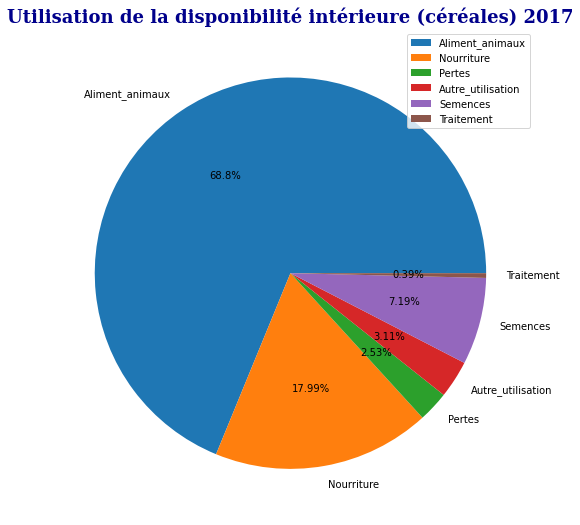

In [89]:
x = [69.34, 18.13, 2.55, 3.13, 7.25, 0.39] 


plt.figure(figsize=(10,9))
plt.pie(x, labels = ['Aliment_animaux', 'Nourriture', 'Pertes', 'Autre_utilisation', 'Semences', 'Traitement'],\
       normalize = True,
       autopct = lambda x: str(round(x, 2)) + '%' )
plt.title("Utilisation de la disponibilité intérieure (céréales) 2017",
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
plt.legend(loc='upper right')

### Question 6 : Utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition

In [66]:
#Sélectionne le manioc au niveau mondial
manioc_mondial = pop_nourries.loc[(pop_nourries["Produit"]=="Manioc")]
manioc_mondial

,Pays,Produit,Origine,Dispo_alim(cal/personne/jour),Nb_habitants,dispo_total_annee
110,Afrique du Sud,Manioc,vegetale,0.0,57009756.0,0.000000e+00
203,Albanie,Manioc,vegetale,0.0,2884169.0,0.000000e+00
295,Algérie,Manioc,vegetale,0.0,41389189.0,0.000000e+00
390,Allemagne,Manioc,vegetale,0.0,82658409.0,0.000000e+00
475,Angola,Manioc,vegetale,560.0,29816766.0,6.094547e+12
...,...,...,...,...,...,...
15108,Égypte,Manioc,vegetale,0.0,96442591.0,0.000000e+00
15201,Émirats arabes unis,Manioc,vegetale,3.0,9487203.0,1.038849e+10
15294,Équateur,Manioc,vegetale,6.0,16785361.0,3.675994e+10
15390,États-Unis d'Amérique,Manioc,vegetale,0.0,325084756.0,0.000000e+00


In [67]:
dispo_manioc_mondial = manioc_mondial["dispo_total_annee"].sum() / (2500*365)
print("On pourrait nourrir avec le manioc ", int(dispo_manioc_mondial), " personnes par an.")

On pourrait nourrir avec le manioc  115439847  personnes par an.


In [68]:
prop_dispo_manioc_mondial = (dispo_manioc_mondial*100)/total_pop2017
round(prop_dispo_manioc_mondial,2)

1.53

In [69]:
#Voir le manioc pour la Thaïlande
thailande_manioc = df_dispo_ali.loc[(df_dispo_ali["Produit"]=="Manioc") & (df_dispo_ali["Pays"]=="Thaïlande")]
thailande_manioc

,Pays,Produit,Origine,Aliment_animaux,Autre_utilisation,Dispo_alim(cal/personne/jour),Dispo_ali_qte(kg/personne/an),Dispo_matiere_grasse(g/personne/jour),Dispo_proteine(g/personne/jour),Dispo_interieure,Exportations,Importations,Nourriture,Pertes,Production,Semences,Traitement,Variation_stock
13809,Thaïlande,Manioc,vegetale,1800000.0,2081000.0,40.0,13.0,0.05,0.14,6264000.0,25214000.0,1250000.0,871000.0,1511000.0,30228000.0,0.0,0.0,0.0


On voit que le manioc représente 40cal par jour par personne, ce qui n'est pas négligeable. Le pays en pdt 30 millions de tonnes, en exporte 25 millions. Seulement 871k tonnes sont consacrées à la nourriture humaine. 

In [70]:
# Ajout colonne proportion pour voir le tx de sous_nutri par pays ds notre ancien merge (fichier pop et sous nut) :
prop_sous_nutri["proportion"] = (prop_sous_nutri["Valeur_sous_nutri"] *100) / prop_sous_nutri["Nb_habitants"]
prop_sous_nutri

,Pays,Nb_habitants,Valeur_sous_nutri,proportion
0,Afghanistan,36296113.0,10500000.0,28.928718
1,Afrique du Sud,57009756.0,3100000.0,5.437666
2,Albanie,2884169.0,100000.0,3.467203
3,Algérie,41389189.0,1300000.0,3.140917
4,Allemagne,82658409.0,0.0,0.000000
...,...,...,...,...
198,Venezuela (République bolivarienne du),29402484.0,8000000.0,27.208586
199,Viet Nam,94600648.0,6500000.0,6.870989
200,Yémen,27834819.0,0.0,0.000000
201,Zambie,16853599.0,0.0,0.000000


In [71]:
# % et pop sous_nutrie de la thailande 
Thailande_sous_nutri=prop_sous_nutri.loc[prop_sous_nutri["Pays"]=="Thaïlande", :]
Thailande_sous_nutri

,Pays,Nb_habitants,Valeur_sous_nutri,proportion
185,Thaïlande,69209810.0,6200000.0,8.958268


En thaïlande, plus de 6 millions d'habitants, soit 9% sont en état de sous_nutrition. Pourtant, le pays exporte plus de 25 millions de tonnes de manioc chaque année.

In [72]:
#Calcul du tx d'exportation du manioc
exportation_manioc =(thailande_manioc["Exportations"] * 100) / thailande_manioc["Production"]
print('Proportion de manioc exporté :', "{:.2f}".format(thailande_manioc['Exportations'].iloc[0]*100 / thailande_manioc['Production'].iloc[0]), "%")

Proportion de manioc exporté : 83.41 %


Le manioc a une grande valeur calorique/nutritive (40cal/j/p) ce qui permettrait d'éviter cette sous-nutrition. Pourquoi la thaïlande en exporte t-elle autant ? Ne pourrait elle pas les garder pour sa propre population ? Qu'en est il des 1.5 millions de perte, peut-on les limiter ? 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.1- Questions de Mélanie </h3>
</div>


### Question 1 : liste des pays en 2017 où la proportion des pays sous-nutri est la plus élevé

In [73]:
liste_pays_sous_nutris =prop_sous_nutri.sort_values(by = "proportion", ascending=False).head(10)
liste_pays_sous_nutris

,Pays,Nb_habitants,Valeur_sous_nutri,proportion
78,Haïti,10982366.0,5300000.0,48.259182
157,République populaire démocratique de Corée,25429825.0,12000000.0,47.188685
108,Madagascar,25570512.0,10500000.0,41.062924
103,Libéria,4702226.0,1800000.0,38.279742
100,Lesotho,2091534.0,800000.0,38.249438
183,Tchad,15016753.0,5700000.0,37.957606
161,Rwanda,11980961.0,4200000.0,35.055619
121,Mozambique,28649018.0,9400000.0,32.810898
186,Timor-Leste,1243258.0,400000.0,32.173531
0,Afghanistan,36296113.0,10500000.0,28.928718


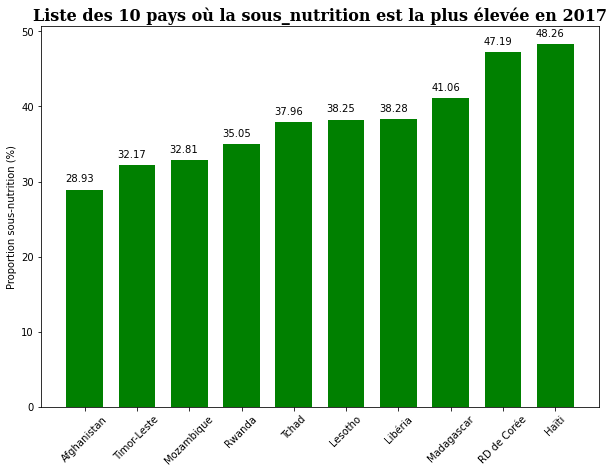

In [74]:
df1=pd.DataFrame ({
                "Group":["Afghanistan","Timor-Leste","Mozambique","Rwanda","Tchad","Lesotho","Libéria","Madagascar","RD de Corée","Haïti"],
                "Valeurs": [28.93, 32.17, 32.81, 35.05, 37.96, 38.25, 38.28, 41.06, 47.19, 48.26]
})

plt.figure(figsize=(10,7))
plt.bar(df1["Group"], df1["Valeurs"], width= 0.7, color="green")
plt.title("Liste des 10 pays où la sous_nutrition est la plus élevée en 2017",
                     fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 16});
plt.ylabel('Proportion sous-nutrition (%)')
plt.xticks(rotation=45)
plt.grid(False)
i = 0
j = 1
# Annotating the bar plot with the values (proportion sous-nut)
for i in range(len(df1.Group)):
    plt.annotate(df1.Valeurs[i], (-0.1 + i, df1.Valeurs[i] + j), ha="center")
    
plt.savefig("Liste des 10 pays les plus sous-nutris")

### Question 2 : liste des pays qui ont le plus bénéficié d'aide depuis 2013

In [75]:
liste_pays_aide = df_aide_ali.groupby(["Pays"]).sum().sort_values(by="Qte_produit_aide(tonne)", ascending=False).head(10)
liste_pays_aide

,Annee,Qte_produit_aide(tonne)
Pays,,
République arabe syrienne,76543,1858943
Éthiopie,66460,1381294
Yémen,76553,1206484
Soudan du Sud,44309,695248
Soudan,48335,669784
Kenya,54376,552836
Bangladesh,50347,348188
Somalie,54377,292678
République démocratique du Congo,50350,288502


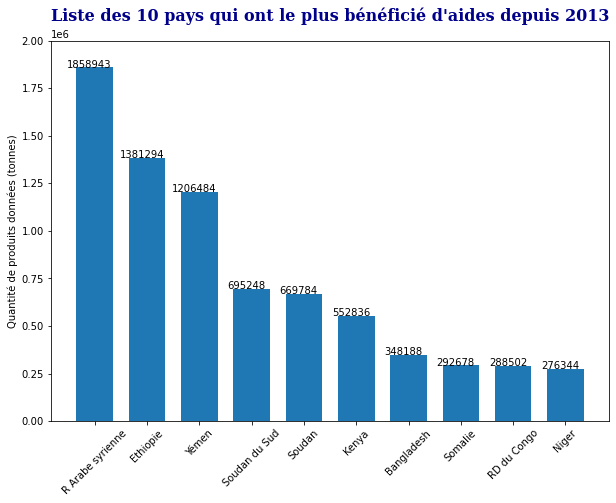

In [76]:
df2=pd.DataFrame ({
                "Group":["R Arabe syrienne","Ethiopie","Yémen","Soudan du Sud","Soudan","Kenya","Bangladesh","Somalie","RD du Congo","Niger"],
                "Valeurs": [1858943, 1381294, 1206484, 695248, 669784, 552836, 348188, 292678, 288502, 276344]
})

plt.figure(figsize=(10,7))
plt.bar(df2.Group, df2.Valeurs, width= 0.7)
plt.title("Liste des 10 pays qui ont le plus bénéficié d'aides depuis 2013",pad=(20),
                     fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 16});
plt.ylabel('Quantité de produits données (tonnes)')
plt.xticks(rotation=45)
plt.ylim([0, 2000000])
i = 0
j = 1
# Annotating the bar plot with the values (qte pdts donnees)
for i in range(len(df2.Group)):
    plt.annotate(df2.Valeurs[i], (-0.1 + i, df2.Valeurs[i] + j), ha="center")
    
plt.savefig("Liste des 10 pays qui ont le plus bénéficié d'aides")

Liste des pays qui ont le plus bénéficié d'aides depuis 2013
On voit que sur ces 10 aucun des pays qui ont reçu le plus d'aide depuis 2013 ne font partie des pays qui sont les plus dénutris. Mais ils ont des contextes géo-politique plutôt complexes (guerres?)

In [77]:
liste_pays_aide_moins = df_aide_ali.groupby(["Pays"]).sum().sort_values(by="Qte_produit_aide(tonne)", ascending=True).head(10)
liste_pays_aide_moins

,Annee,Qte_produit_aide(tonne)
Pays,,
Bolivie (État plurinational de),4028,6
Géorgie,30202,70
Timor-Leste,8052,116
Vanuatu,10075,802
Égypte,4026,1122
"Chine, continentale",8056,1298
Équateur,10065,1362
Sao Tomé-et-Principe,18121,1826
Tadjikistan,42287,2028


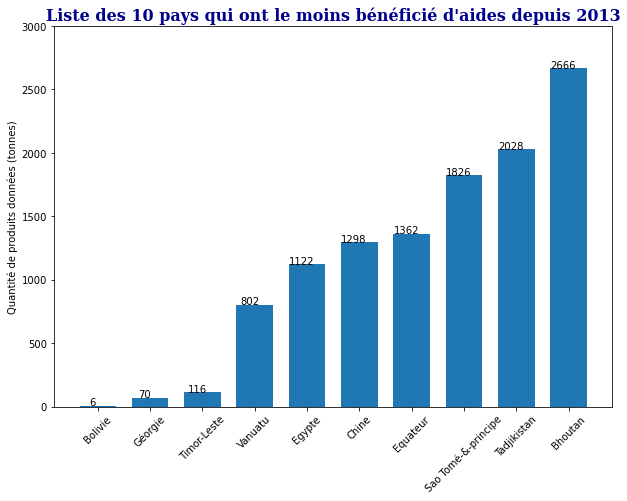

In [78]:
df3=pd.DataFrame ({
                "Group":["Bolivie","Géorgie","Timor-Leste","Vanuatu","Egypte","Chine","Equateur","Sao Tomé-&-principe","Tadjikistan","Bhoutan"],
                "Valeurs": [6, 70, 116, 802, 1122, 1298, 1362, 1826, 2028, 2666]
})


plt.figure(figsize=(10,7))
plt.bar(df3.Group, df3.Valeurs, width= 0.7)
plt.title("Liste des 10 pays qui ont le moins bénéficié d'aides depuis 2013",
                     fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 16});
plt.ylabel('Quantité de produits données (tonnes)')
plt.xticks(rotation=45)
plt.ylim([0, 3000])
i = 1
j = 0
# Annotating the bar plot with the values (qte pdts donnees)
for i in range(len(df3.Group)):
    plt.annotate(df3.Valeurs[i], (-0.1 + i, df3.Valeurs[i] + j), ha="center")
    
plt.savefig("Liste des 10 pays qui ont le moins bénéficié d'aides")

Si on prends les deux valeurs les plus hautes de qte de pdt données pour les tableaux : 1858943/2666=697.28

On peut presque dire que les pays avec le moinds d'aide, on eu 700 fois moins d'aide que ceux qui en ont eu le plus. 

### Question 3 : Liste des pays ayant le plus et le moins de dispo alimentaire depuis 2013

In [79]:
dispo_totale_plus= df_dispo_ali[['Pays','Produit','Dispo_alim(cal/personne/jour)']].groupby(["Pays"]).sum()
dispo_totale_plus.sort_values(by='Dispo_alim(cal/personne/jour)',ascending=False).head(10)

,Dispo_alim(cal/personne/jour)
Pays,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


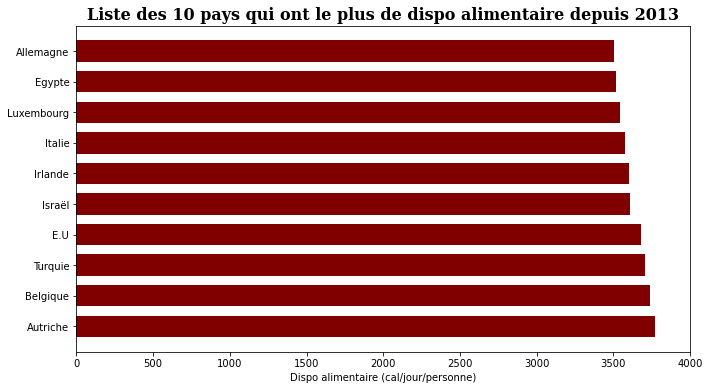

In [80]:
df4=pd.DataFrame = ({
        "Group":["Autriche","Belgique","Turquie","E.U","Israël","Irlande","Italie","Luxembourg","Egypte","Allemagne"],
        "Valeurs": [3770, 3737, 3708, 3682, 3610, 3602, 3578, 3540, 3518, 3503]
})
                    
plt.figure(figsize=(11,6))
plt.barh( df4["Group"], df4["Valeurs"], height=0.7, color="maroon")
plt.title("Liste des 10 pays qui ont le plus de dispo alimentaire depuis 2013",
                     fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 16});
plt.xlabel('Dispo alimentaire (cal/jour/personne)')
plt.xlim([0, 4000])
    
plt.savefig("Liste des 10 pays qui ont le plus de dispo alimentaire depuis 2013")

In [81]:
dispo_totale_moins= df_dispo_ali[['Pays','Produit','Dispo_alim(cal/personne/jour)']].groupby(["Pays"]).sum()
dispo_totale_moins.sort_values(by='Dispo_alim(cal/personne/jour)',ascending=True).head(10)

,Dispo_alim(cal/personne/jour)
Pays,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


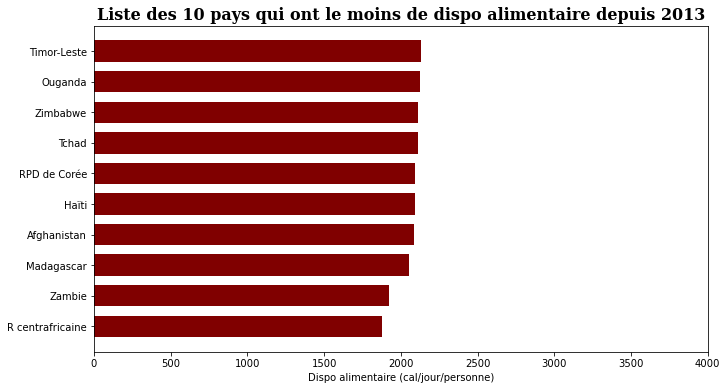

In [82]:
df5=pd.DataFrame = ({
        "Group":["R centrafricaine","Zambie","Madagascar","Afghanistan","Haïti","RPD de Corée","Tchad","Zimbabwe","Ouganda","Timor-Leste"],
        "Valeurs": [1879, 1924, 2056, 2087, 2089, 2093, 2109, 2113, 2126, 2129]
})
                    
plt.figure(figsize=(11,6))
plt.barh( df5["Group"], df5["Valeurs"], height=0.7, color="maroon")
plt.title("Liste des 10 pays qui ont le moins de dispo alimentaire depuis 2013",
                     fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 16});
plt.xlabel('Dispo alimentaire (cal/jour/personne)')
plt.xlim([0, 4000])
    
plt.savefig("Liste des 10 pays qui ont le moins de dispo alimentaire depuis 2013")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 4 - Conclusion</h2>
</div>

La liste des 10 pays les plus sous nutris ne font pas partie de ceux qui ont eu le plus d’aide, 

Ceux qui ont eu le moins d’aide ne font pas partie de ceux qui sont sous nutris
Ceux qui ont eu le plus d’aide semble être des pays en guerre, contexte géo politiques compliqués

Ceux qui ont eu le plus de dispo ali sont des pays développés
Et inversement ceux qui ont eu le moins sont des pays pauvres, on peut voir sur le graffiq que il y a une diff de presque 50% entre ceux qui ont le plus et le moins d’aides

Timor lesthe fait partie des pays les plus sous_nutris, qui ont le moins bénéficié d’aide et de ceux qui ont le moins de dispo alimentaire 
Haiti fait partie des pays les plus sous nutris et de ceux qui ont le moins de dispo ali

D'ailleurs les pays suivants : Corée, Madagascar, Tchad, Timor-Leste, Afghanistan font parties de ceux qui sont le plus sous-nutries

Le pays de Timor-Leste fait pourtant partie des pays qui ont le moins bénéficié d'aide

Axe d'amélioration : 
- Chercher le nombre théorique de personne pouvant être nourries et sa proportion pour chaque catégorie de produit
- Voir quels sont les produits les plus disponibles, les plus exportés, importés, ceux qui sont le plus nourrissants etc... 
- Voir dans les années passées les pays les plus et les moins aidés, ceux qui ont le plus et le moins de dispo alim par habitants et ceux qui étaient les plus sous-nutries pour voir l'évolution en fonction de 2017. (p-e que ceux qui ont eu le plus d'aide et qui ne sont plus considérés comme les plus sous-nutries ont pu bénéficiés avant d'aide alimentaire conséquente.